<a href="https://colab.research.google.com/github/mnaR99/narco_aguacate/blob/main/notebooks/analisisEstados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cuna de la producción del aguacate 

<h4>¿Cuál es el estado en México con mayor producción de aguacate?</h4>

Gracias a los datos que se limpiaron y almacenaron en 'dfMunicipios.csv', podemos hacer un análisis de cual estado de la República Mexicana que tiene la mayor cantidad de volumen y valor de producción de aguacate. Se dice que Michoacán es el **líder mundial en la producción de este fruto**. ¿Te has preguntado si esto trae alguna repercusión tanto econológica como social? 


---


Primero importemos las librerias necesarias.

In [ ]:
import pandas as pd
import numpy as np

Leemos los '.csv' que se creó previamente y fue almacenado en el repositorio.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mnaR99/narco_aguacate/main/data/processed/dfMunicipios0319.csv")
df.head(5)

,Anio,Idestado,Nomestado,Idddr,Nomddr,Idcader,Nomcader,Idmunicipio,Nommunicipio,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Precio,Valorproduccion
0,2003,1,Aguascalientes,1,Aguascalientes,2,Calvillo,3,Calvillo,7.0,7.0,0.0,19.0,2.71,5421.05,102999.95
1,2003,7,Chiapas,19,San Cristóbal de las Casas,1,San Cristóbal de Las Casas,7,Amatenango del Valle,4.0,4.0,0.0,12.0,3.00,2500.00,30000.00
2,2003,20,Oaxaca,109,Cañada,2,Cuicatlán,177,San Juan Bautista Cuicatlán,16.0,16.0,0.0,96.0,6.00,5245.00,503520.00
3,2003,20,Oaxaca,109,Cañada,2,Cuicatlán,24,Cuyamecalco Villa de Zaragoza,10.0,10.0,0.0,35.0,3.50,2650.00,92750.00
4,2003,20,Oaxaca,109,Cañada,2,Cuicatlán,19,Concepción Pápalo,9.0,9.0,0.0,31.5,3.50,2700.00,85050.00


# Determinar estado con mayor producción

Agrupación por estados durante los años 2003-2019 para visualizar su actividad en relación a este cultivo.

In [ ]:
dfEst = df.groupby(['Anio','Idestado','Nomestado'], as_index=False).agg({
    "Sembrada": "sum",
    "Cosechada": "sum",
    "Siniestrada": "sum",
    "Volumenproduccion": "sum",
    "Rendimiento": "sum",
    "Precio": "sum",
    "Valorproduccion": "sum"
})
dfEst.head(3)

,Anio,Idestado,Nomestado,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Precio,Valorproduccion
0,2003,1,Aguascalientes,7.0,7.0,0.0,19.00,2.71,5421.05,102999.95
1,2003,2,Baja California,45.0,11.0,0.0,46.53,4.23,6500.00,302445.00
2,2003,3,Baja California Sur,151.0,56.0,0.0,100.20,5.70,13500.00,678900.00


Vamos a ver el promedio del volumen de producción expresado en millones de toneladas por cada uno de los estados en un año. Como se puede observar la producción de Michoacán está por lo cielos, ¡alrededor de un millón de toneladas de aguacates por año!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


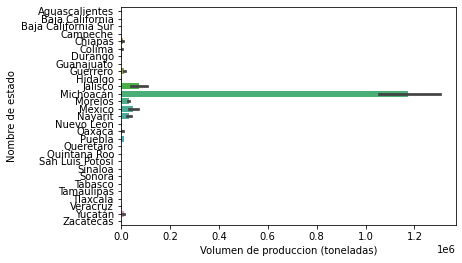

In [ ]:
def visualizar_produccion(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    sizes = df[['Volumenproduccion', 'Nomestado']].copy()
    sizes.sort_values('Nomestado', ascending=True, inplace=True)
    sns.barplot(sizes['Volumenproduccion'], sizes['Nomestado'])
    plt.xlabel("Volumen de produccion (toneladas)")
    plt.ylabel("Nombre de estado")

visualizar_produccion(dfEst)

Veamos que estado destaca en cada una de las columnas en el último año de registro 2019.

In [ ]:
df19 = dfEst[dfEst['Anio'] == 2019]
def maximos(df,cad):

   max = df[cad].max()
   est = df[df[cad] == max]
   print(f'El estado de mayor {cad}: \n\n {est.reset_index(drop=True)}')
  

print('********************** Resultados ************************* \n')
maximos(df19, 'Sembrada')
maximos(df19, 'Cosechada')
maximos(df19, 'Siniestrada')
maximos(df19, 'Volumenproduccion')
maximos(df19, 'Rendimiento')
maximos(df19, 'Precio')
maximos(df19, 'Valorproduccion')

********************** Resultados ************************* 

El estado de mayor Sembrada: 

    Anio  Idestado  Nomestado  ...  Rendimiento      Precio  Valorproduccion
0  2019        16  Michoacán  ...       922.71  2015689.83     3.911687e+10

[1 rows x 10 columns]
El estado de mayor Cosechada: 

    Anio  Idestado  Nomestado  ...  Rendimiento      Precio  Valorproduccion
0  2019        16  Michoacán  ...       922.71  2015689.83     3.911687e+10

[1 rows x 10 columns]
El estado de mayor Siniestrada: 

    Anio  Idestado        Nomestado  ...  Rendimiento    Precio  Valorproduccion
0  2019        24  San Luis Potosí  ...        30.68  73906.89       2771283.57

[1 rows x 10 columns]
El estado de mayor Volumenproduccion: 

    Anio  Idestado  Nomestado  ...  Rendimiento      Precio  Valorproduccion
0  2019        16  Michoacán  ...       922.71  2015689.83     3.911687e+10

[1 rows x 10 columns]
El estado de mayor Rendimiento: 

    Anio  Idestado Nomestado  ...  Rendimiento      Pre

Resumen de los resultados:
*   Michoacán tiene la mayor siembra, cosecha, volumen de producción y valor por producción.
*   San Luis Potosí tiene la mayor cantidad de cultivo siniestrado (dañado).
*   Jalisco tiene el mayor rendimiento.
*   Oaxaca tiene el mayor precio por el cultivo.


---


Claramente Michoacán tiene la cabecera en producción de aguacate en todo México aunque ¿no creen que es algo raro que a pesar de ello otros estados tengan mayores ganancias con tan poca producción?

En los últimos 5 años registrados, Michoacán sigue en la cabecera de producción a nivel nacional.


In [ ]:
dfEst.sort_values('Volumenproduccion', ascending=False).head(5)

,Anio,Idestado,Nomestado,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Precio,Valorproduccion
454,2019,16,Michoacán,167747.45,160206.42,0.0,1725225.79,922.71,2015689.83,3.911687e+10
427,2018,16,Michoacán,166603.84,152399.51,0.0,1674855.04,906.16,1721416.41,3.440518e+10
400,2017,16,Michoacán,158805.98,142052.03,0.0,1565895.76,890.20,1744951.69,3.282312e+10
372,2016,16,Michoacán,148423.53,136995.53,0.0,1477263.36,740.68,1231931.51,2.526096e+10
344,2015,16,Michoacán,134941.76,126468.91,0.0,1283313.29,657.90,930318.42,1.827268e+10


El porcentaje de produccion que toma cada uno de los estados en el último año registrado 2019

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


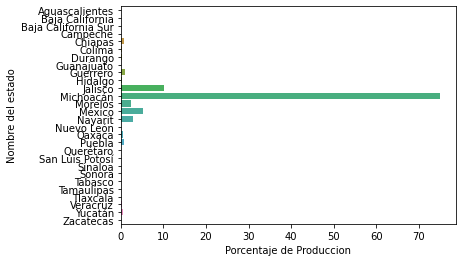

In [ ]:
df19por = pd.DataFrame(df19,columns=['Nomestado','Volumenproduccion','Porcentaje'])
totalProduccion = df19['Volumenproduccion'].sum()

def porcent(df, total):
  import seaborn as sns
  import matplotlib.pyplot as plt

  x = len(df)
  for x in ["Porcentaje"]:
    df['Porcentaje'] = (df['Volumenproduccion']*100)/totalProduccion
    
  sizes = df[['Porcentaje', 'Nomestado']].copy()
  sizes.sort_values('Nomestado', ascending=True, inplace=True)
  sns.barplot(sizes['Porcentaje'], sizes['Nomestado'])
  plt.xlabel("Porcentaje de Produccion")
  plt.ylabel("Nombre del estado")

porcent(df19por,totalProduccion)

#*   Dataframe de Michoacan

Como pudimos observar, Michoacán es el líder en producción de aguacate, por lo tanto liberamos los datos para estudiarlos por cada uno de los municipios.

In [ ]:
dfMich = df[df["Nomestado"] == "Michoacán"]
dfMich.head(3)

,Anio,Idestado,Nomestado,Idddr,Nomddr,Idcader,Nomcader,Idmunicipio,Nommunicipio,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Precio,Valorproduccion
362,2003,16,Michoacán,90,Pátzcuaro,2,Villa Escalante,79,Salvador Escalante,3520.0,3520.0,0.0,45056.0,12.8,4930.0,222126080.0
363,2003,16,Michoacán,90,Pátzcuaro,2,Villa Escalante,9,Ario,3380.0,3380.0,0.0,22308.0,6.6,4900.0,109309200.0
364,2003,16,Michoacán,90,Pátzcuaro,2,Villa Escalante,9,Ario,2262.0,2262.0,0.0,28720.0,12.7,5100.0,146472000.0


Quitamos la columna 'Nomestado' y 'Idestado', ya que ya sabemos que hablamos de Michoacán y no es necesario. Por último, reseteamos el index. 

In [ ]:
dfMich = dfMich.loc[:,['Anio', 'Idddr', 'Nomddr', 'Idcader','Nomcader', 
                        'Idmunicipio', 'Nommunicipio', 'Sembrada', 'Cosechada',
                        'Siniestrada', 'Volumenproduccion', 'Rendimiento', 
                        'Precio', 'Valorproduccion']]
dfMich.reset_index(drop=True).head(3)

,Anio,Idddr,Nomddr,Idcader,Nomcader,Idmunicipio,Nommunicipio,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Precio,Valorproduccion
0,2003,90,Pátzcuaro,2,Villa Escalante,79,Salvador Escalante,3520.0,3520.0,0.0,45056.0,12.8,4930.0,222126080.0
1,2003,90,Pátzcuaro,2,Villa Escalante,9,Ario,3380.0,3380.0,0.0,22308.0,6.6,4900.0,109309200.0
2,2003,90,Pátzcuaro,2,Villa Escalante,9,Ario,2262.0,2262.0,0.0,28720.0,12.7,5100.0,146472000.0


¡Listo! Guardemoslo

In [ ]:
dfMich.to_csv(r'/dfMichoacan.csv', index = False)